In this notebook we will visualize feature maps of resnet-34 architecture. <br>
refrences:<br>
https://ravivaishnav20.medium.com/visualizing-feature-maps-using-pytorch-12a48cd1e573 <br>


In [1]:
# import libraries
import torch
import torch.nn as nn
import torchvision
from torchvision import models, transforms, utils
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image
import json
%matplotlib inline

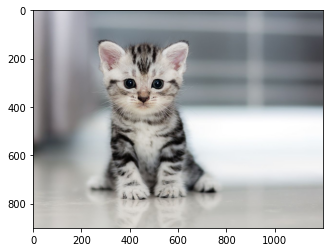

In [15]:
# transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=0., std=1.)
])
# load image
image = Image.open(str('cat.jpg'))
plt.imshow(image)

In [16]:
model = models.resnet34(pretrained=True)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

the printed model shows that resnet34 has 4 layers. Layer 1, 2, 3 and 4 have 3, 4, 5 and 3 BasicBlocks, respectively. Each BasicBlock is made up of a combination of conv2d, relu and batchnorm modules. <br>
we are going to visualize feature maps afte Conv2d modules. 

In [17]:
# we will save the conv layer weights in this list
model_weights =[]
#we will save the 49 conv layers in this list
conv_layers = []
# get all the model children as list
model_children = list(model.children())
#counter to keep count of the conv layers
counter = 0
#append all the conv layers and their respective wights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter+=1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter+=1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolution layers: {counter}")
for layer in conv_layers:
  print(layer)

Total convolution layers: 33
Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(128, 128, kernel_siz

##visualising the filters:

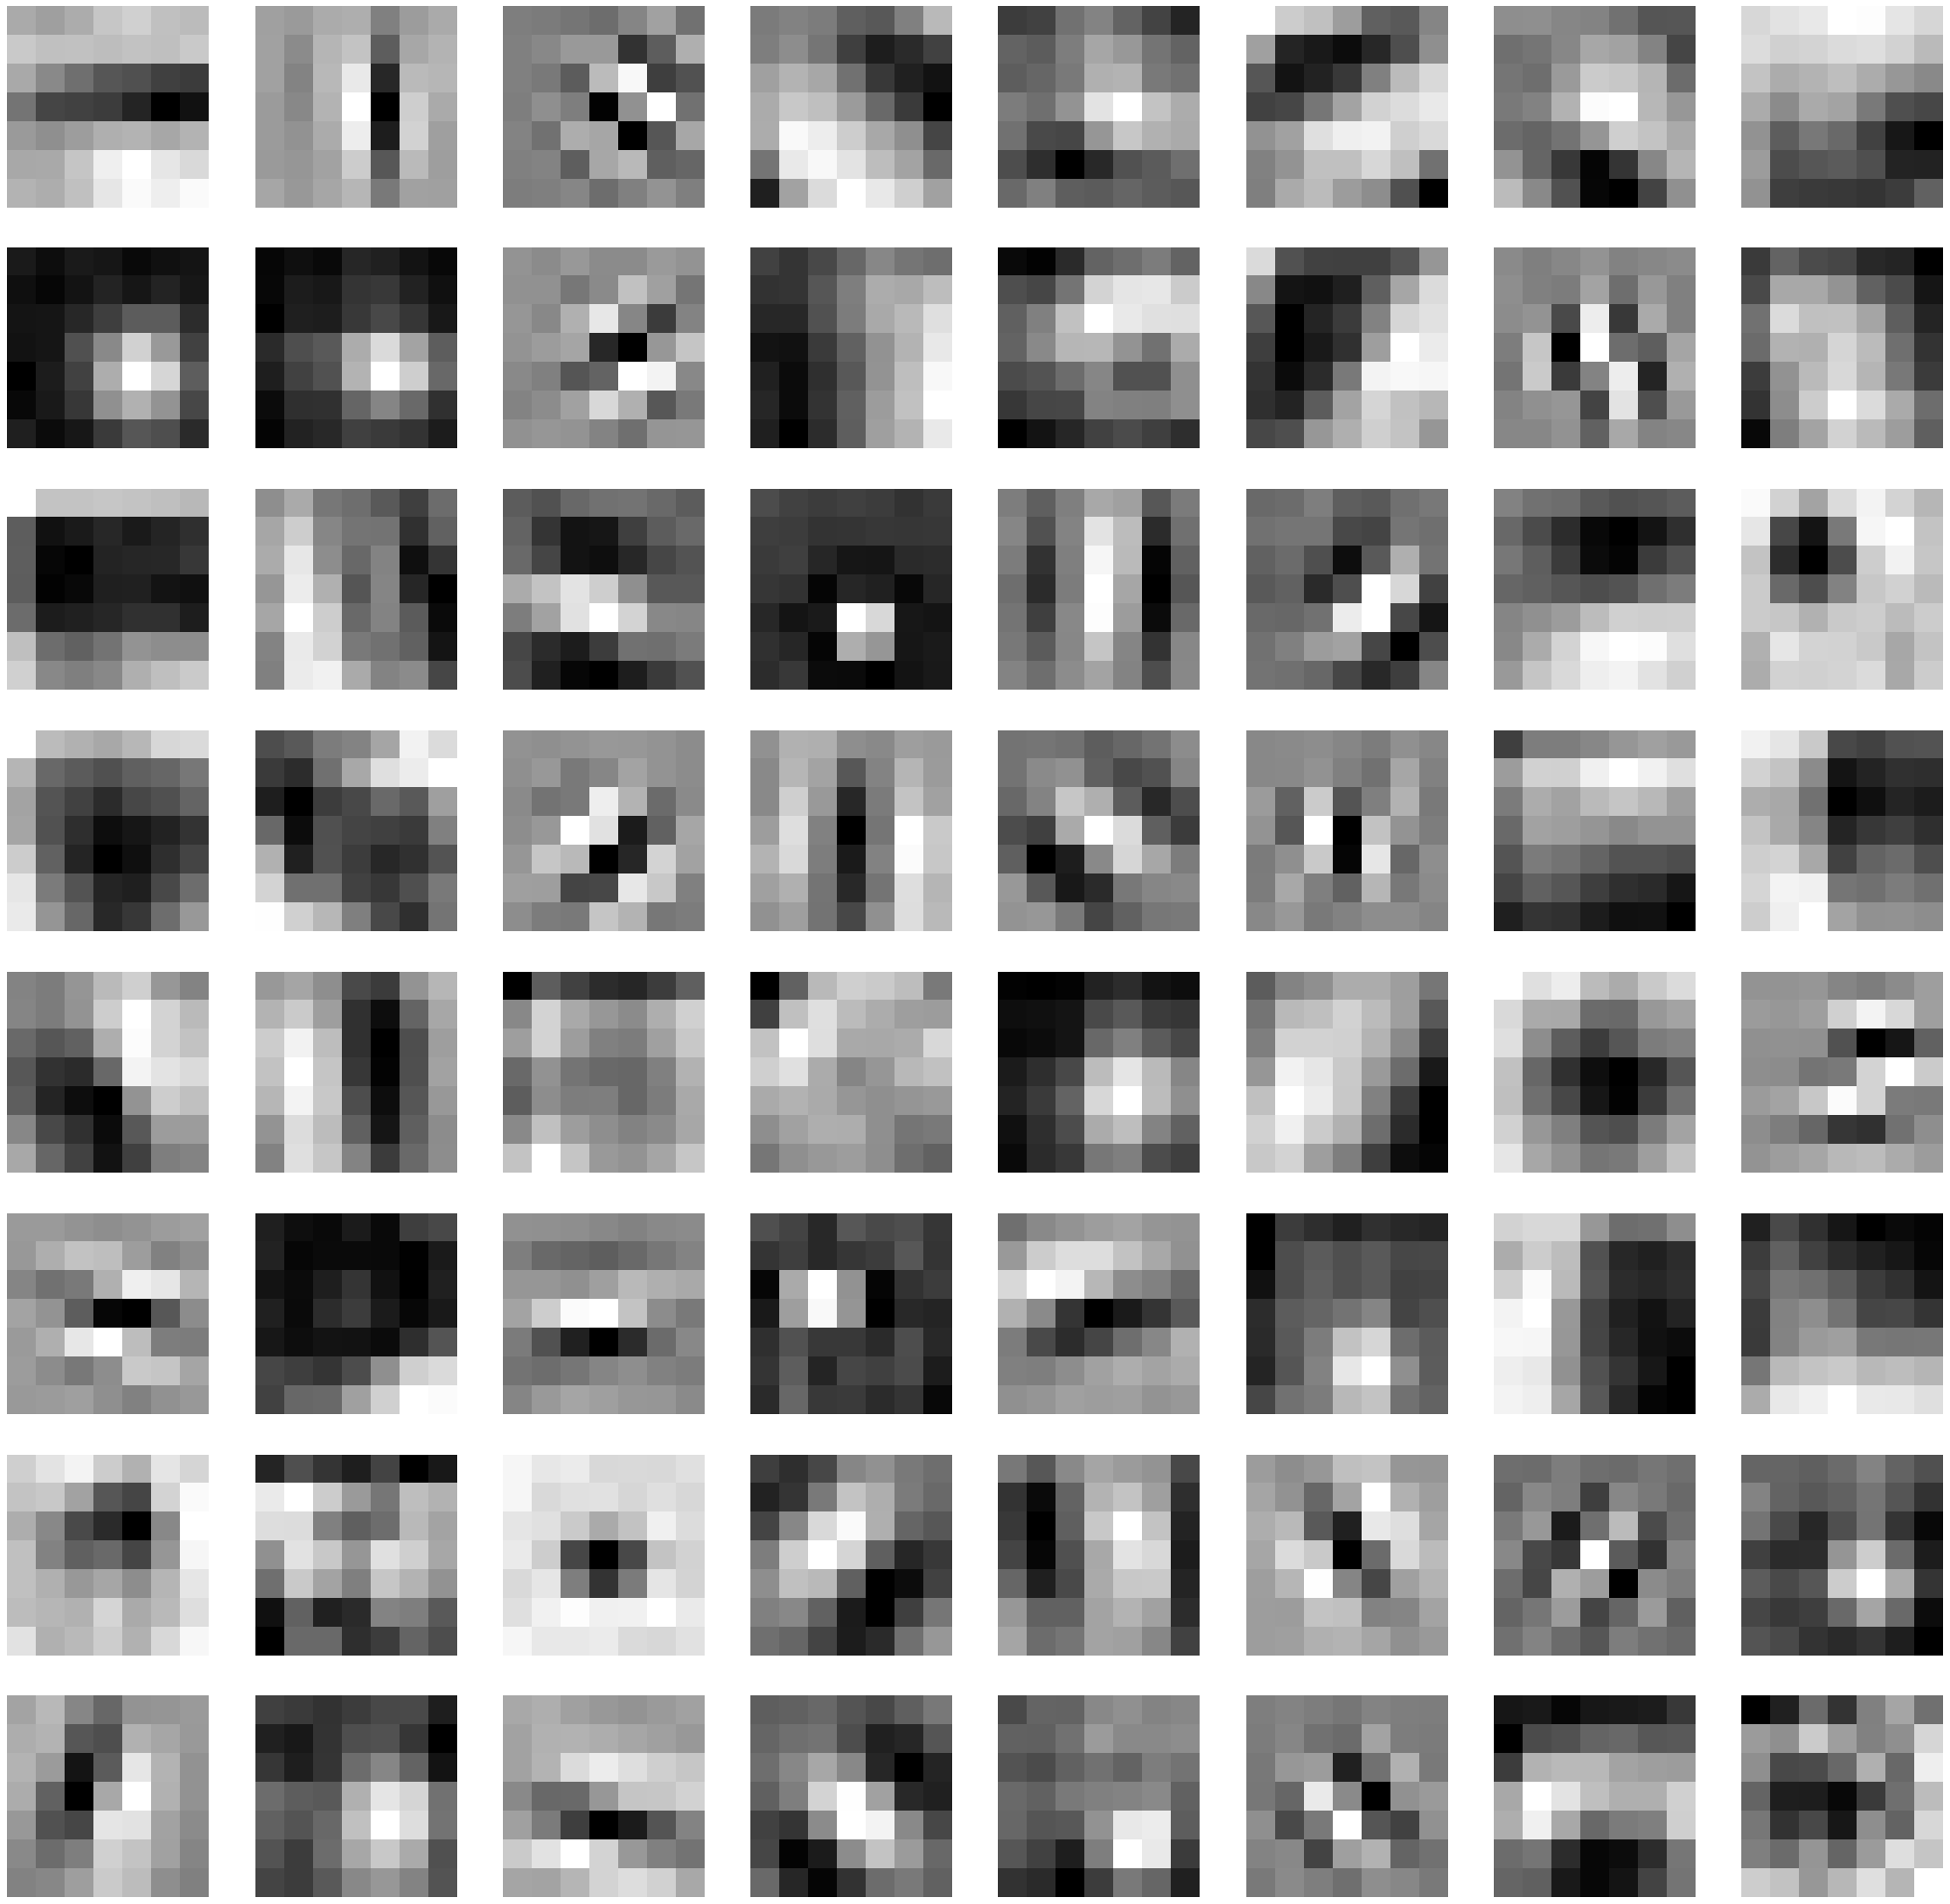

In [18]:
# cnn filters of first conv layer (7*7 kernels)
plt.figure(figsize=(35, 35))
for index, filter in enumerate(model_weights[0]):
    plt.subplot(8, 8, index + 1)
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')

plt.show()


list of some filters in first convolutional layer with what the find

1.   find horizontal lines
2.   find vertical lines
3.   short diagonal line 
.<br>
.<br>
.<br>
64. <br>
briefly, each filter is in charge of finding the visualized patterns in the output of its last layer.
<br>
in the next layers, the filters search for a combination of thease patterns in the image.




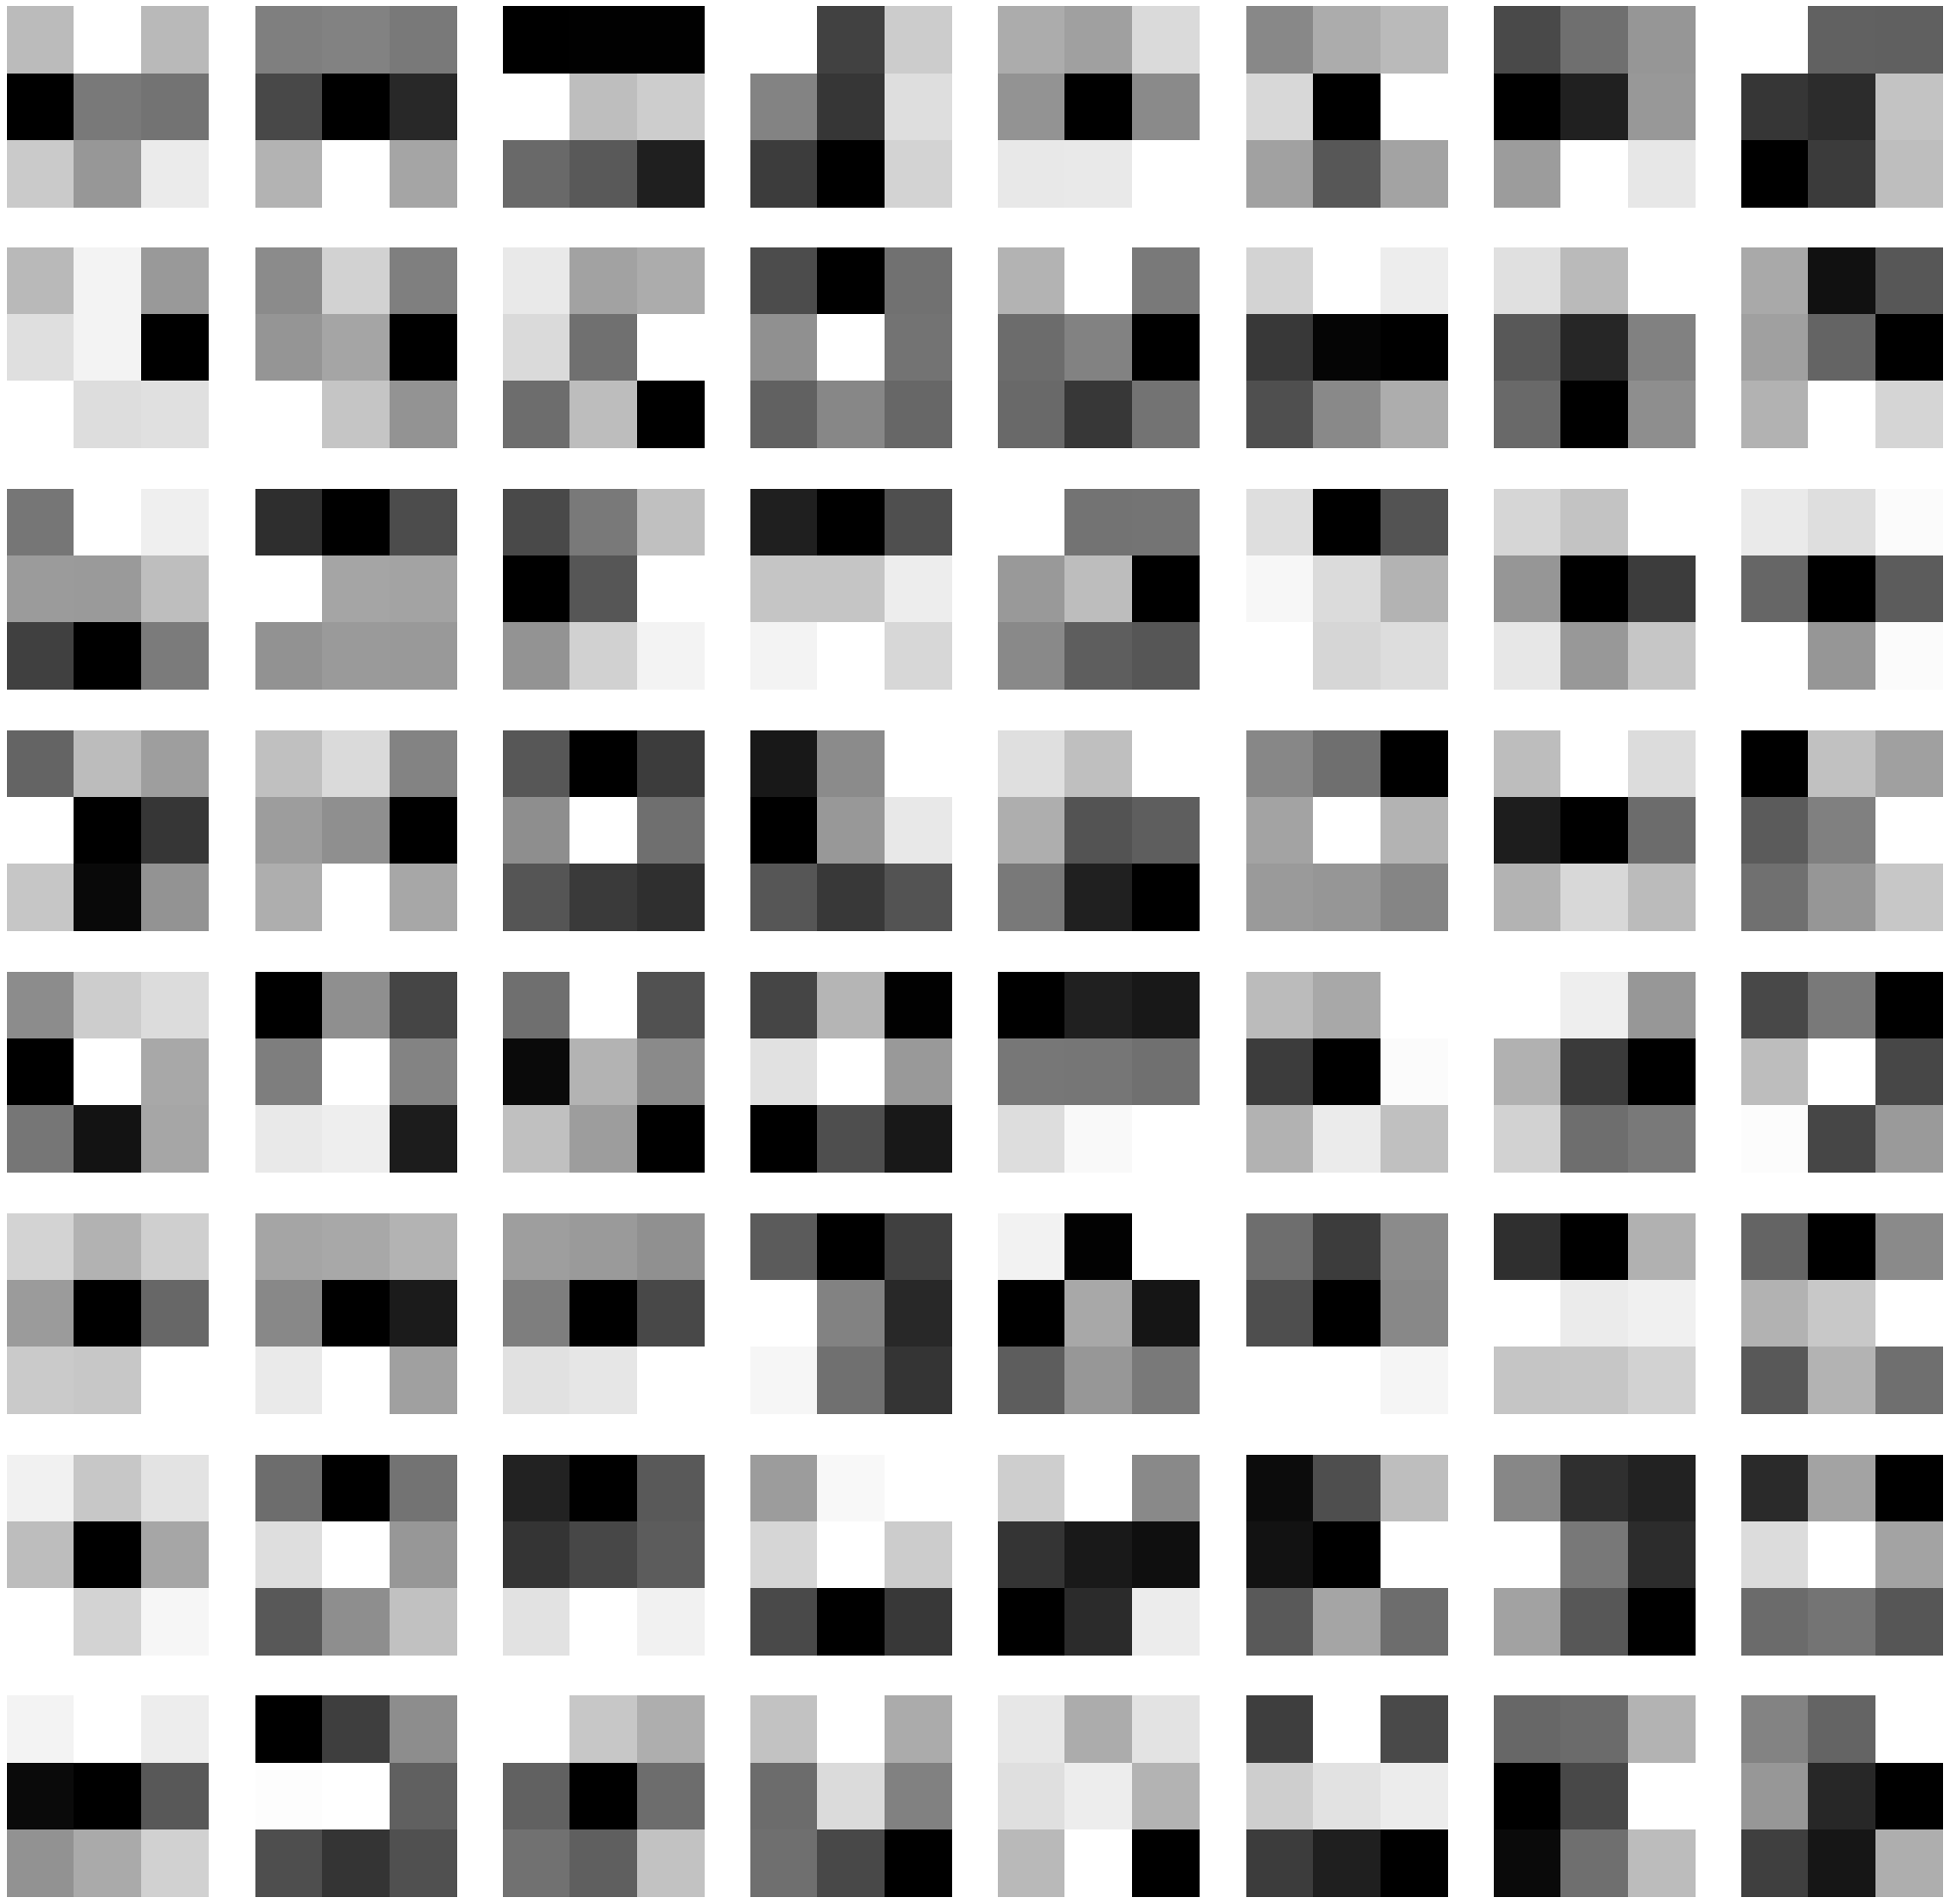

In [19]:
# cnn filters of second conv layer (3*3 kernels)
plt.figure(figsize=(35, 35))
for index, filter in enumerate(model_weights[1]):
    plt.subplot(8, 8, index + 1)
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')

plt.show()

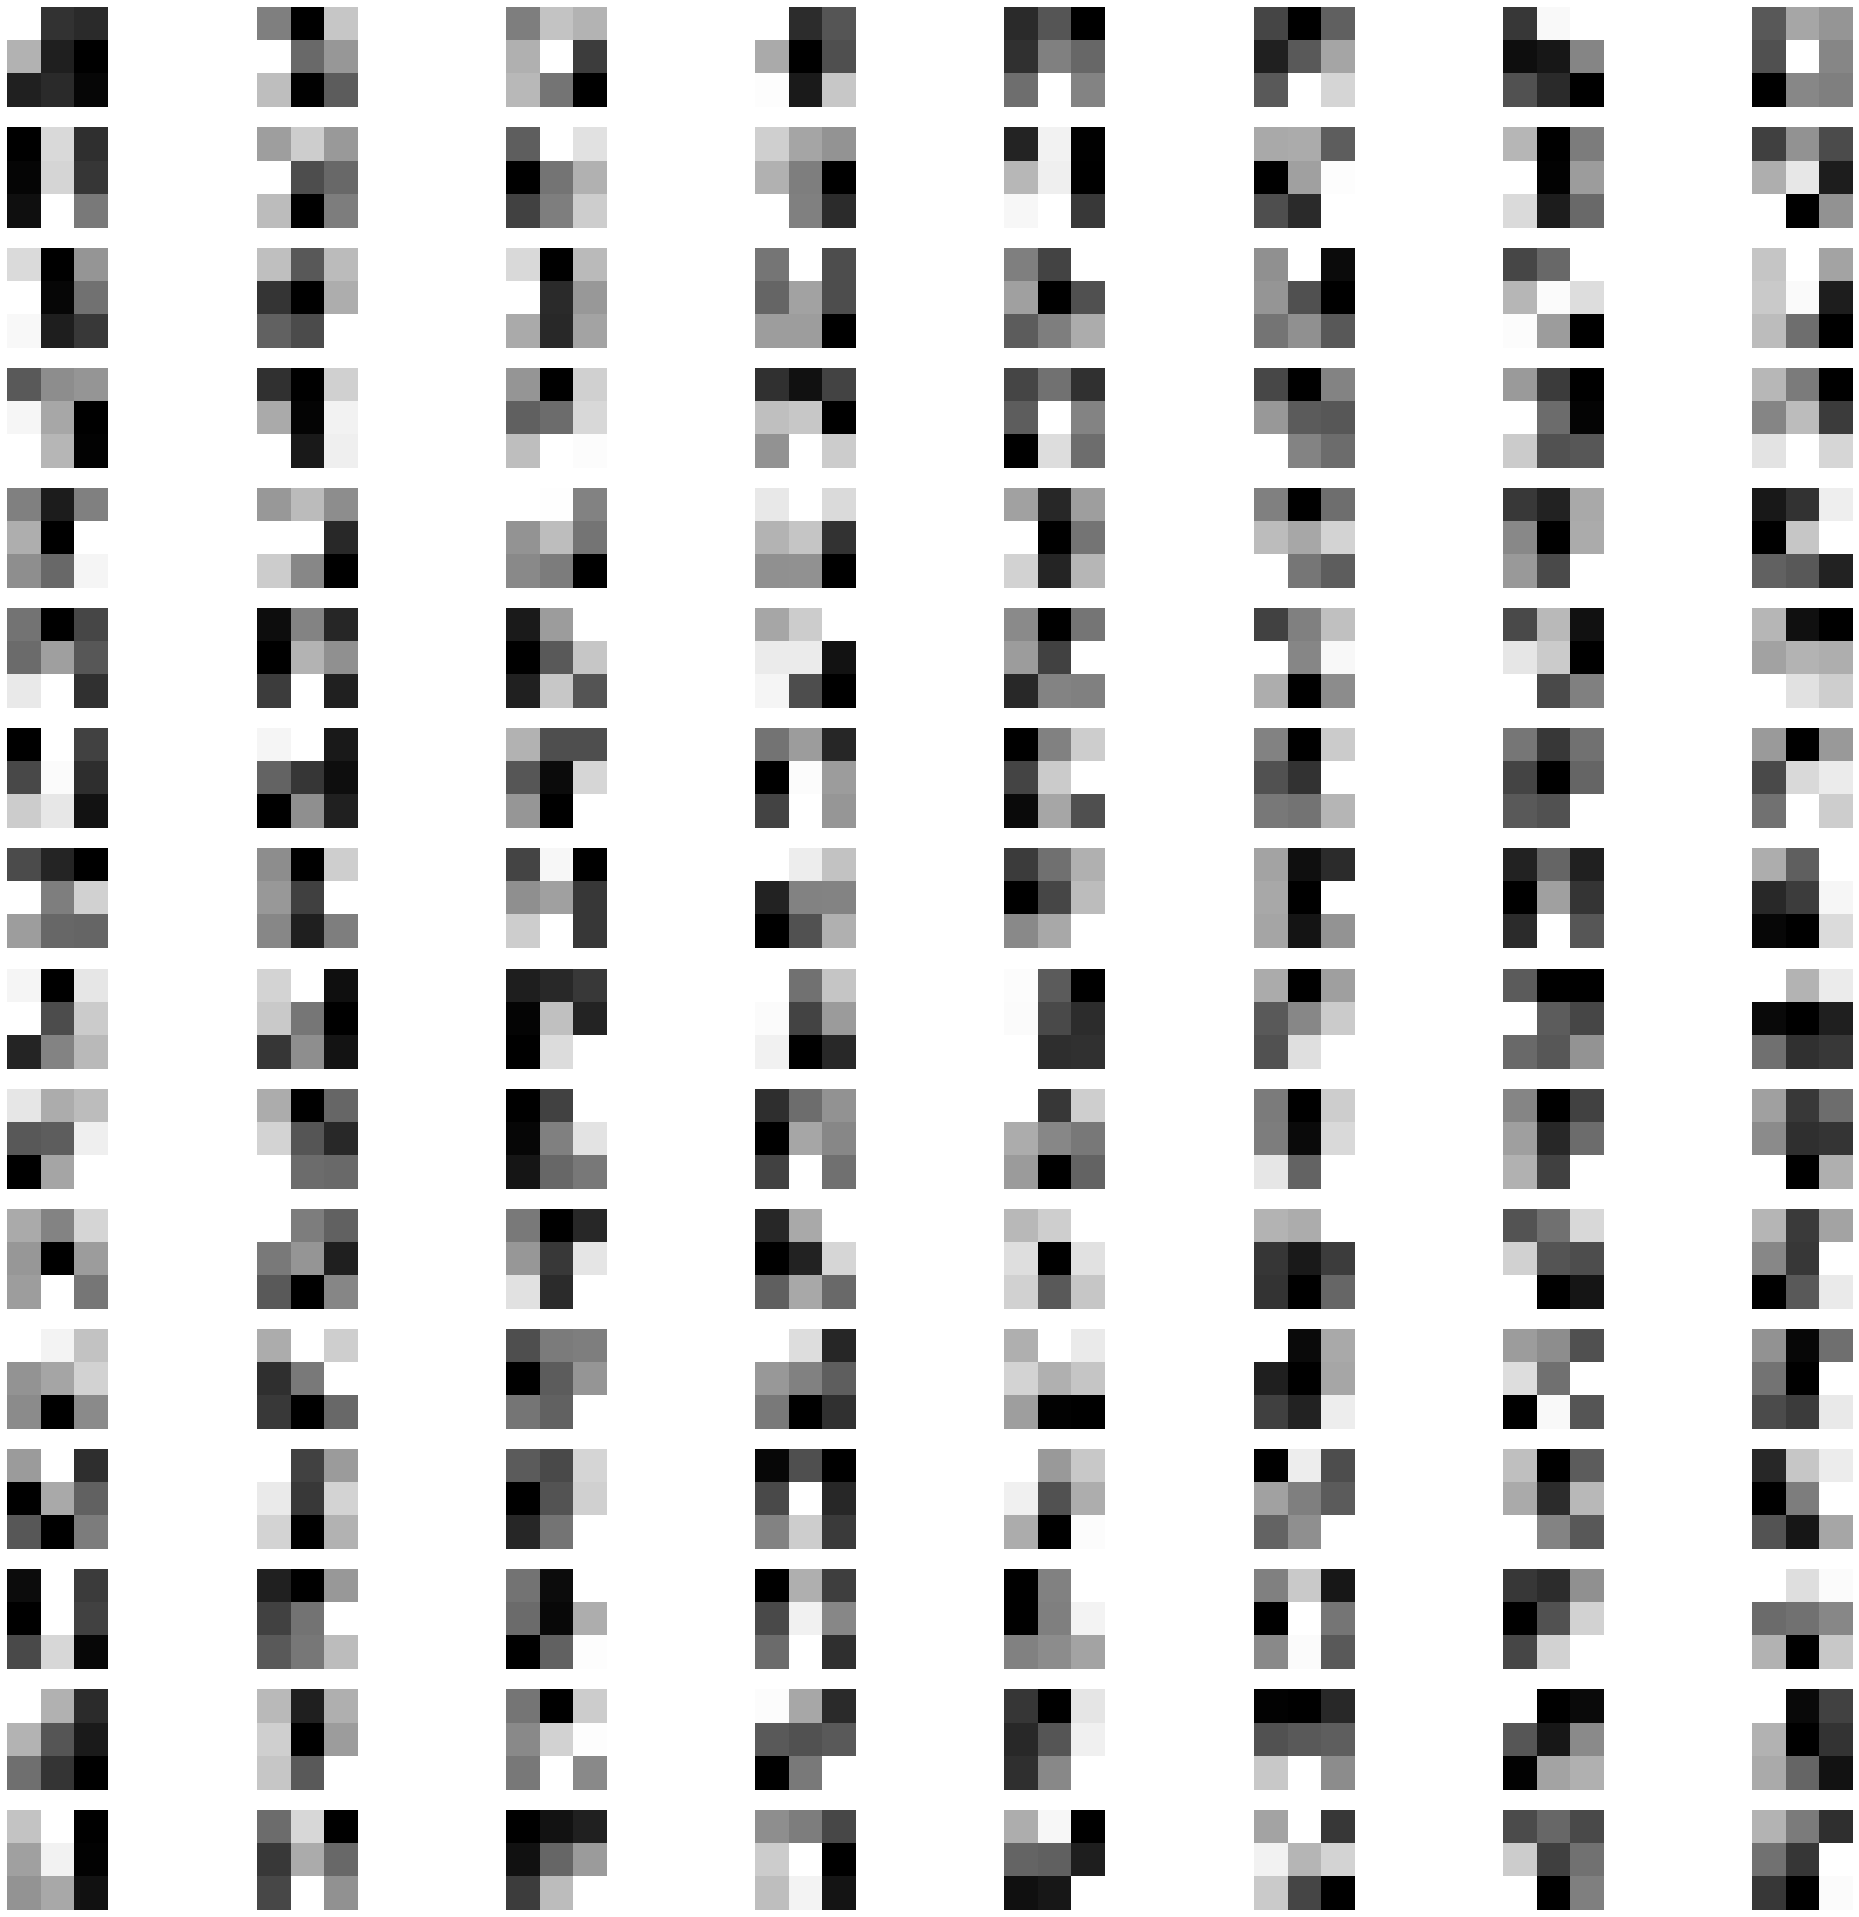

In [20]:
# cnn filters of 15th conv layer (3*3 kernels)
plt.figure(figsize=(35, 35))
for index, filter in enumerate(model_weights[14]):
    plt.subplot(16, 8, index + 1)
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')

plt.show()

The first filters are responsible for detecting simple patterns in the image. But going further in layers, detected patterns become more complex patterns. For example, a filter in the first layers detects simple vertical lines, but the ones in the following layers may find eyes in an image. 

##visualizing the feature maps:

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
image = transform(image)
print(f"Image shape before: {image.shape}")
image = image.unsqueeze(0)
print(f"Image shape after: {image.shape}")
image = image.to(device)

Image shape before: torch.Size([3, 224, 224])
Image shape after: torch.Size([1, 3, 224, 224])


In [22]:
outputs = []
names = []
for layer in conv_layers[0:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))
print(len(outputs))
#print feature_maps
for feature_map in outputs:
    print(feature_map.shape)

33
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 128, 56, 56])
torch.Size([1, 128, 56, 56])
torch.Size([1, 128, 56, 56])
torch.Size([1, 128, 56, 56])
torch.Size([1, 128, 56, 56])
torch.Size([1, 128, 56, 56])
torch.Size([1, 128, 56, 56])
torch.Size([1, 128, 56, 56])
torch.Size([1, 256, 28, 28])
torch.Size([1, 256, 28, 28])
torch.Size([1, 256, 28, 28])
torch.Size([1, 256, 28, 28])
torch.Size([1, 256, 28, 28])
torch.Size([1, 256, 28, 28])
torch.Size([1, 256, 28, 28])
torch.Size([1, 256, 28, 28])
torch.Size([1, 256, 28, 28])
torch.Size([1, 256, 28, 28])
torch.Size([1, 256, 28, 28])
torch.Size([1, 256, 28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])


We convert the 3d feature maps to 2d by sum over the chanels. 

In [23]:
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
for fm in processed:
    print(fm.shape)

(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(56, 56)
(56, 56)
(56, 56)
(56, 56)
(56, 56)
(56, 56)
(56, 56)
(56, 56)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)


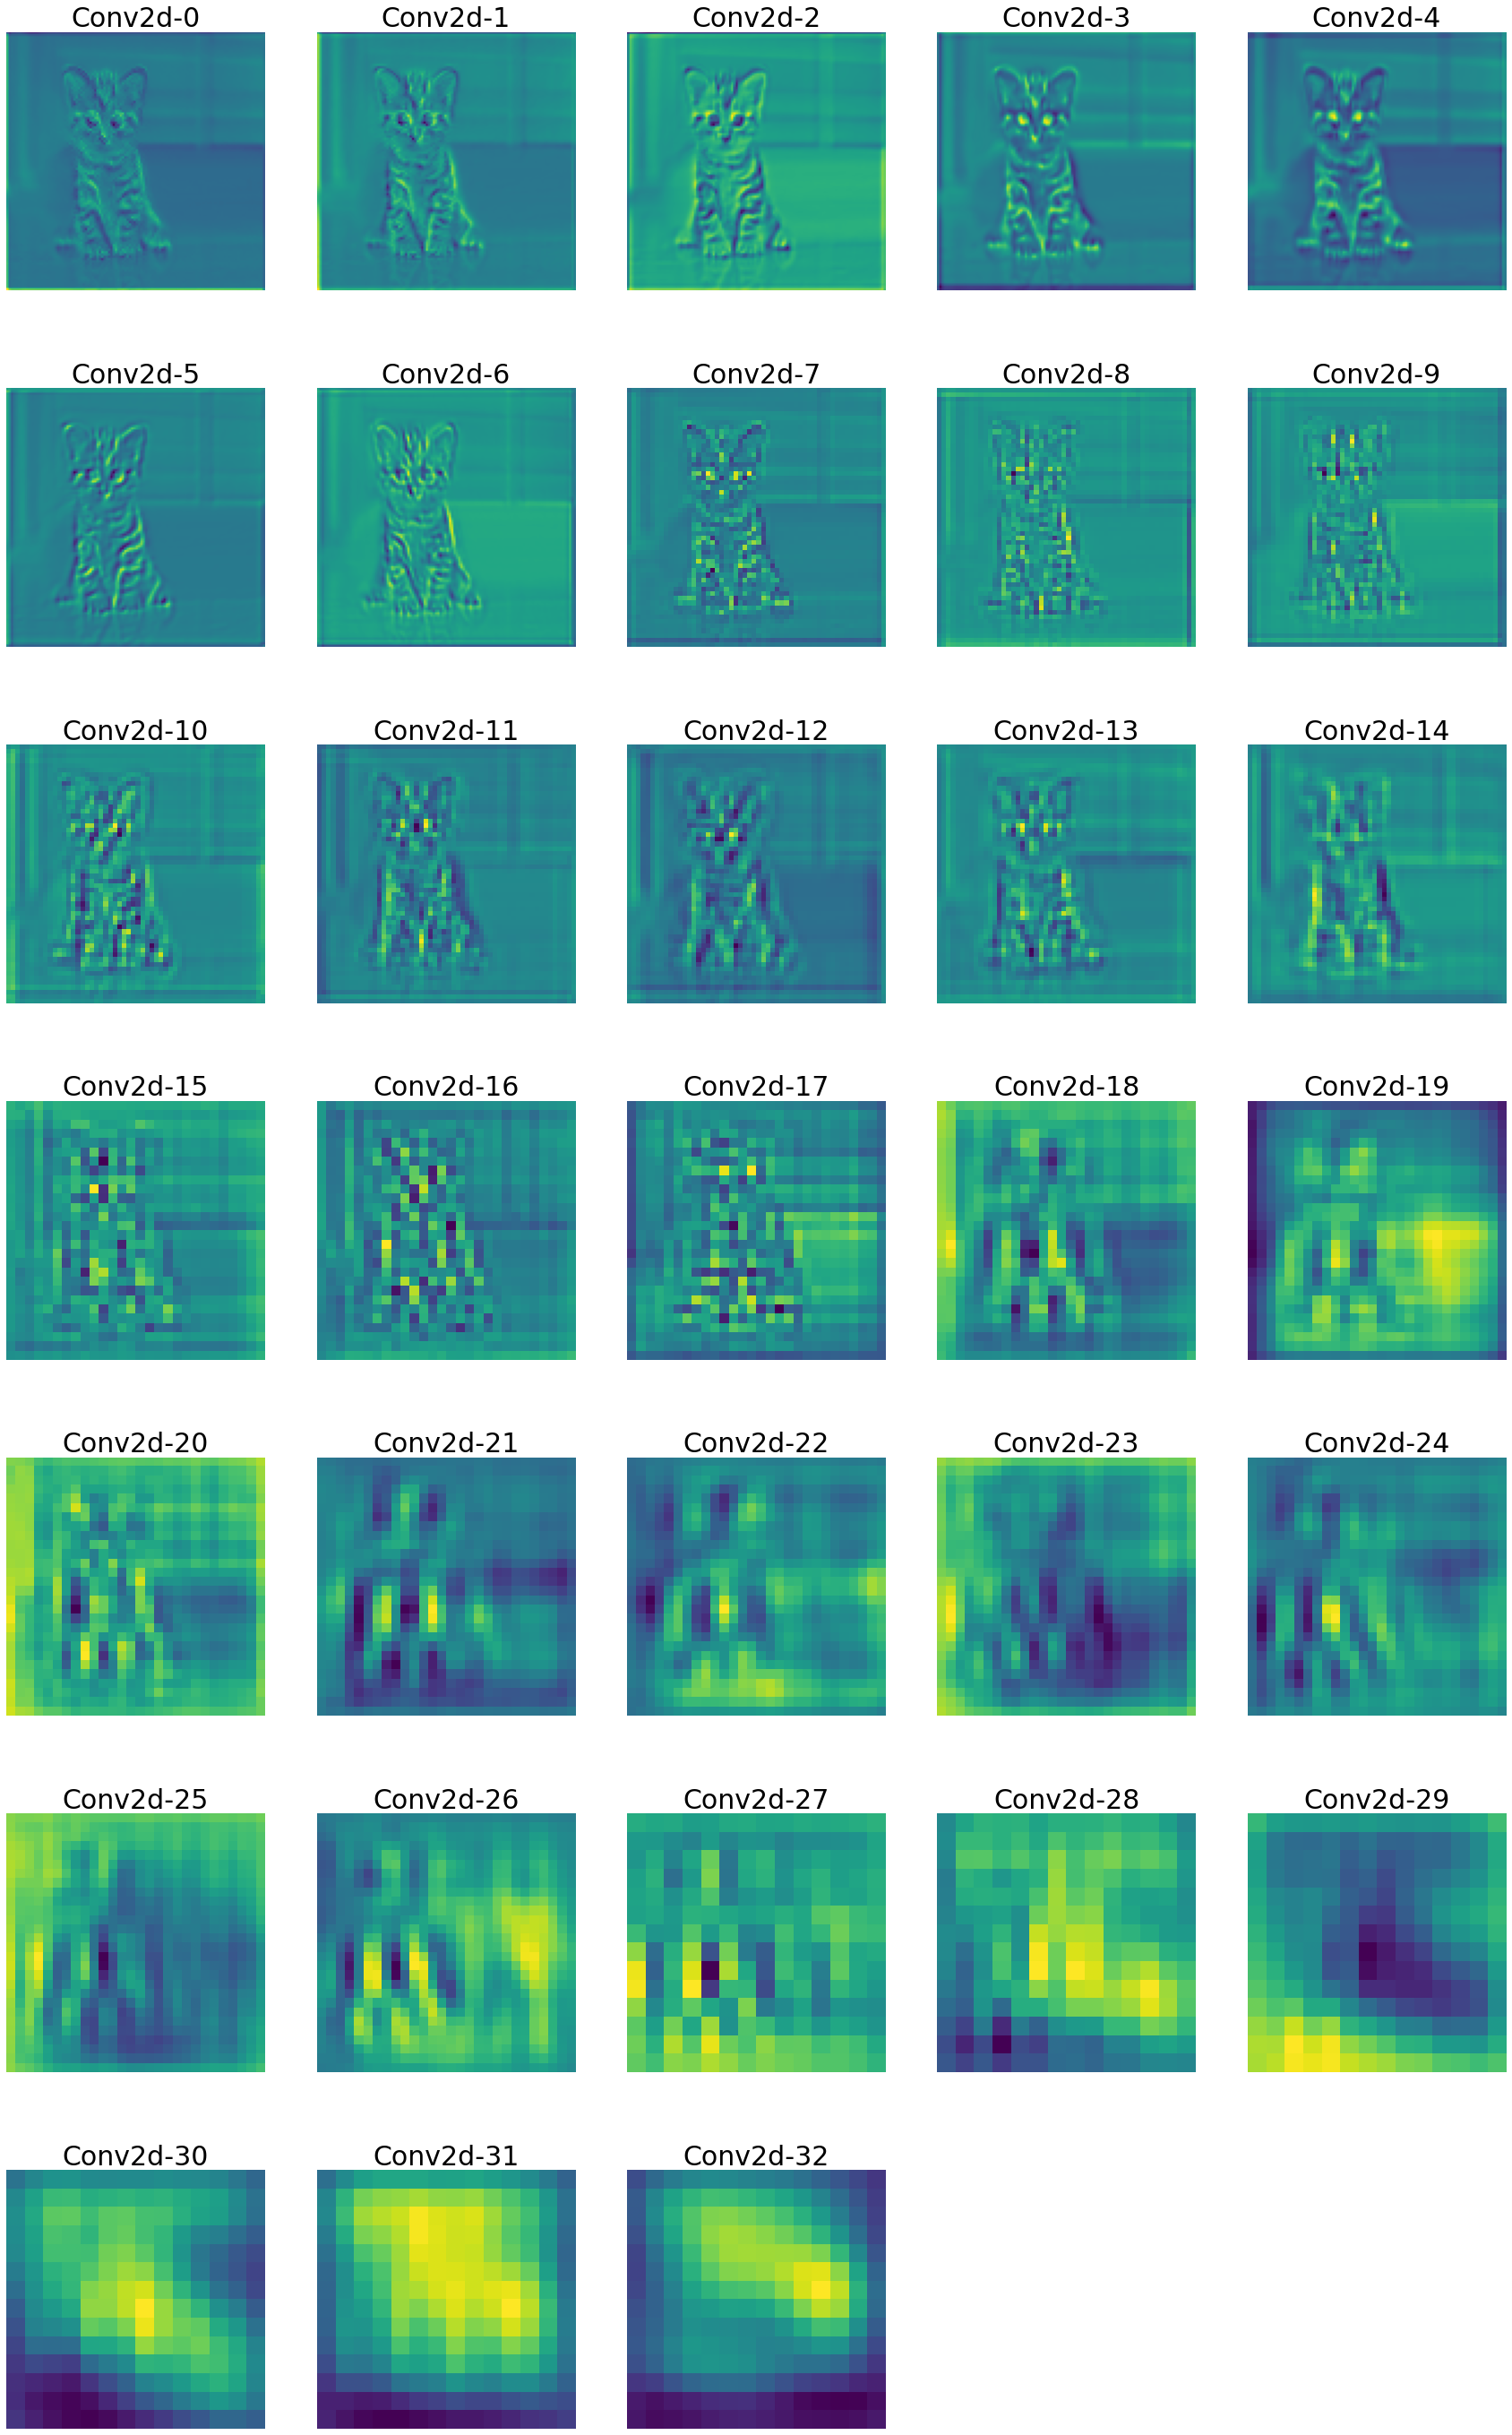

In [24]:
fig = plt.figure(figsize=(30, 50))
for i in range(len(processed)):
    a = fig.add_subplot(7, 5, i+1)
    imgplot = plt.imshow(processed[i])
    a.axis("off")
    a.set_title(names[i].split('(')[0]+'-'+str(i), fontsize=30)
plt.savefig(str('feature_maps.jpg'), bbox_inches='tight')

The first feature maps are visually similar to the original image hence more interpretable by humans. They detect some general features of the image, for example, edges, lines, and intensity, exactly what traditional image processing methods do. But as we go deeper in layers, the features become more semantical, which results in a decision about the input image. Each layer combines the features found by its last layer to extract more complex features. Features in first layers are more detailed and the model abstracts the details in the next layers into more general features. 
<br>
The brighter parts in each feature map, shows the most important features found in that conv layer. 
<br>
1. (layer 1, conv1 to conv6)<br>
conv1 detecting the edges, conv 2 detecting the brighter part of image, conv3 to conv6 detecting different color
<br>
2. (layer 2, conv 7 to conv 14) 
<br>
detecting longer lines with special shape 
<br>
3. (layer 3, conv 15 to conv 26)
<br>
detecting special combinations of lines
4. (layer 4, conv 27 to conv 32)
<br>
detecting an object, 
in the 2 last feature maps the whole cat object is detected and the network is ready to decide the class of image. 